In [1]:
import os
HOME = os.getcwd()
print(HOME)

/home/ec2-user/S15


In [2]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (216/216), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 325 (delta 158), reused 155 (delta 155), pack-reused 109
Receiving objects: 100% (325/325), 2.23 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/home/ec2-user/S15/yolov9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
roboflow 1.1.28 requires opencv-python-headless==4.8.0.74, but you have opencv-python-headless 4.9.0.80 which is incompatible.


In [3]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [4]:
!ls -la {HOME}/weights

total 402432
drwxrwxr-x 2 ec2-user ec2-user        80 May 13 19:06 .
drwxrwxr-x 5 ec2-user ec2-user        80 May 13 19:06 ..
-rw-rw-r-- 1 ec2-user ec2-user  51508261 Feb 18 12:36 gelan-c.pt
-rw-rw-r-- 1 ec2-user ec2-user 117203713 Feb 18 12:36 gelan-e.pt
-rw-rw-r-- 1 ec2-user ec2-user 103153312 Feb 18 12:36 yolov9-c.pt
-rw-rw-r-- 1 ec2-user ec2-user 140217688 Feb 18 12:36 yolov9-e.pt


In [5]:
!ls -la {HOME}/customdata

total 36
drwxrwxr-x 4 ec2-user ec2-user    71 May 13 18:09 .
drwxrwxr-x 5 ec2-user ec2-user    80 May 13 19:06 ..
-rw-rw-r-- 1 ec2-user ec2-user   157 May 13 18:09 data.yaml
drwxrwxr-x 2 ec2-user ec2-user  4096 May 13 17:59 images
drwxrwxr-x 2 ec2-user ec2-user  4096 May 13 17:59 labels
-rw-rw-r-- 1 ec2-user ec2-user 22549 May 13 18:09 labels.cache


In [6]:
!python train_dual.py \
--batch 8 --epochs 40 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--weights {HOME}/weights/yolov9-e.pt \
--cfg {HOME}/yolov9/models/detect/yolov9-e.yaml \
--hyp hyp.scratch-high.yaml \
--data {HOME}/customdata/data.yaml

train_dual: weights=/home/ec2-user/S15/weights/yolov9-e.pt, cfg=/home/ec2-user/S15/yolov9/models/detect/yolov9-e.yaml, data=/home/ec2-user/S15/customdata/data.yaml, hyp=hyp.scratch-high.yaml, epochs=40, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=0, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLOv5 🚀 1e33dbb Python-3.10.14 torch-2.2.0 CUDA:0 (Tesla T4, 14931MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=7.5, cls=0.5, cls_pw=1.0, dfl=1.

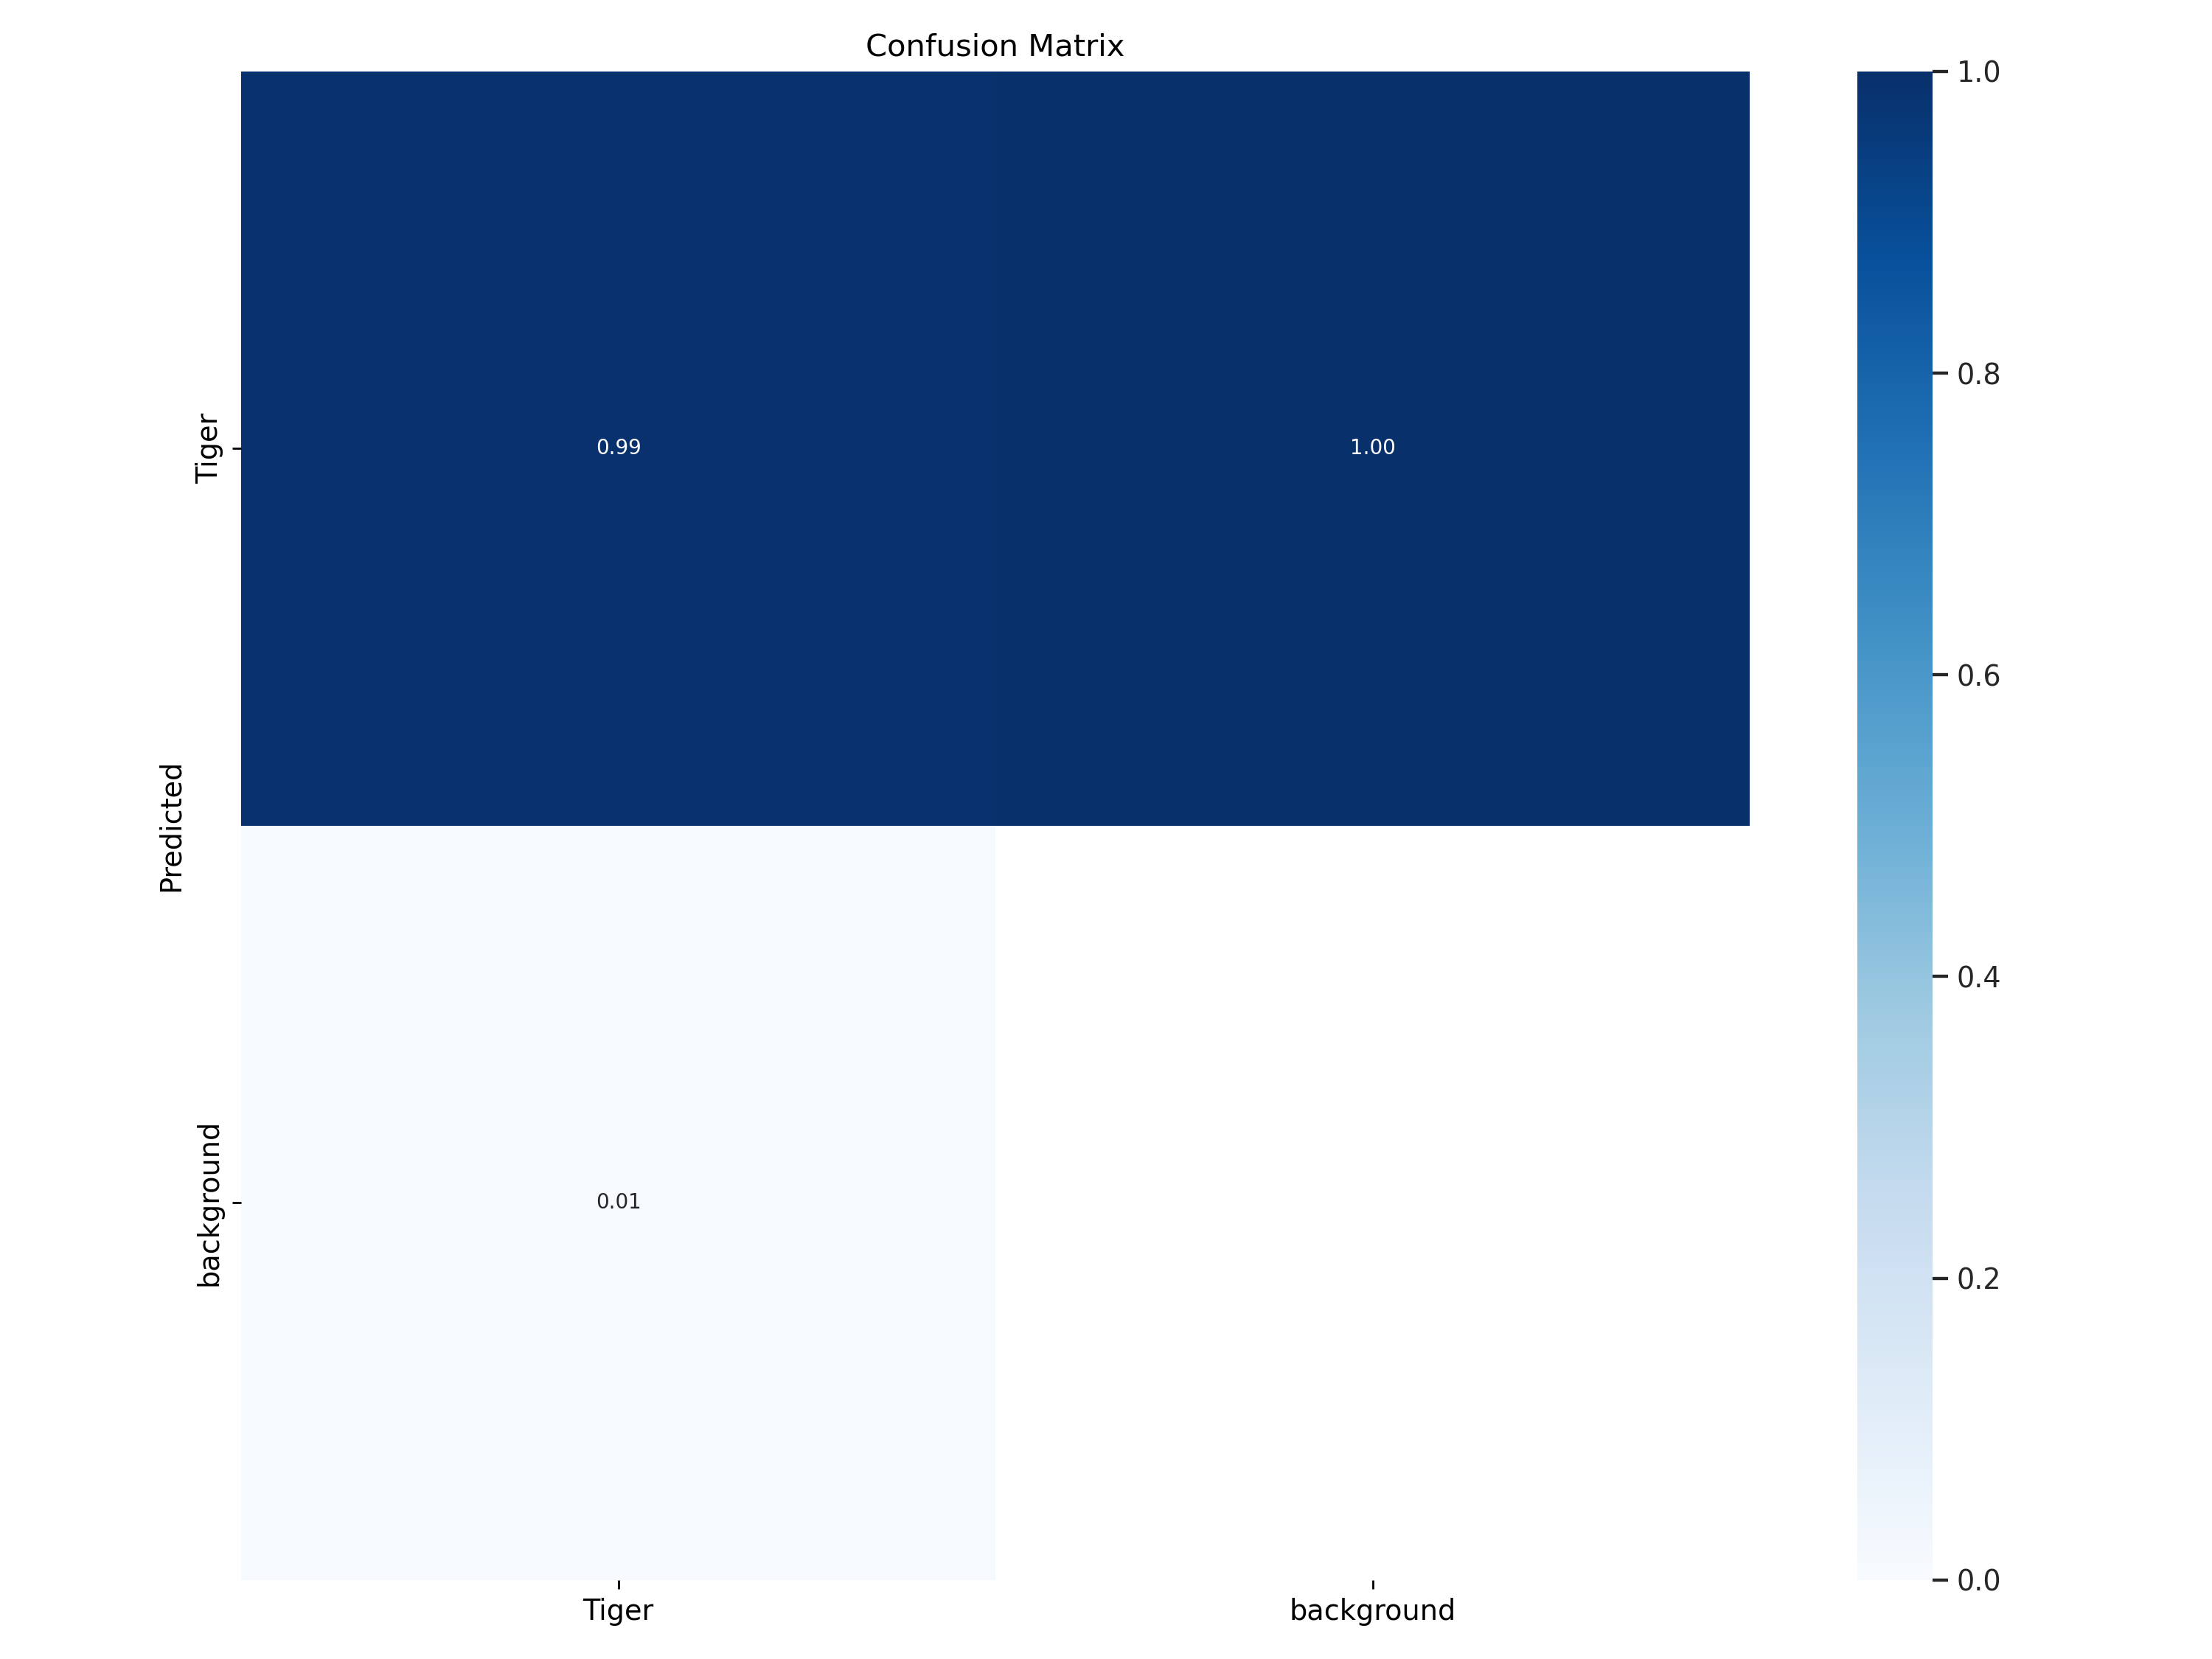

In [8]:
from IPython.display import Image
Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

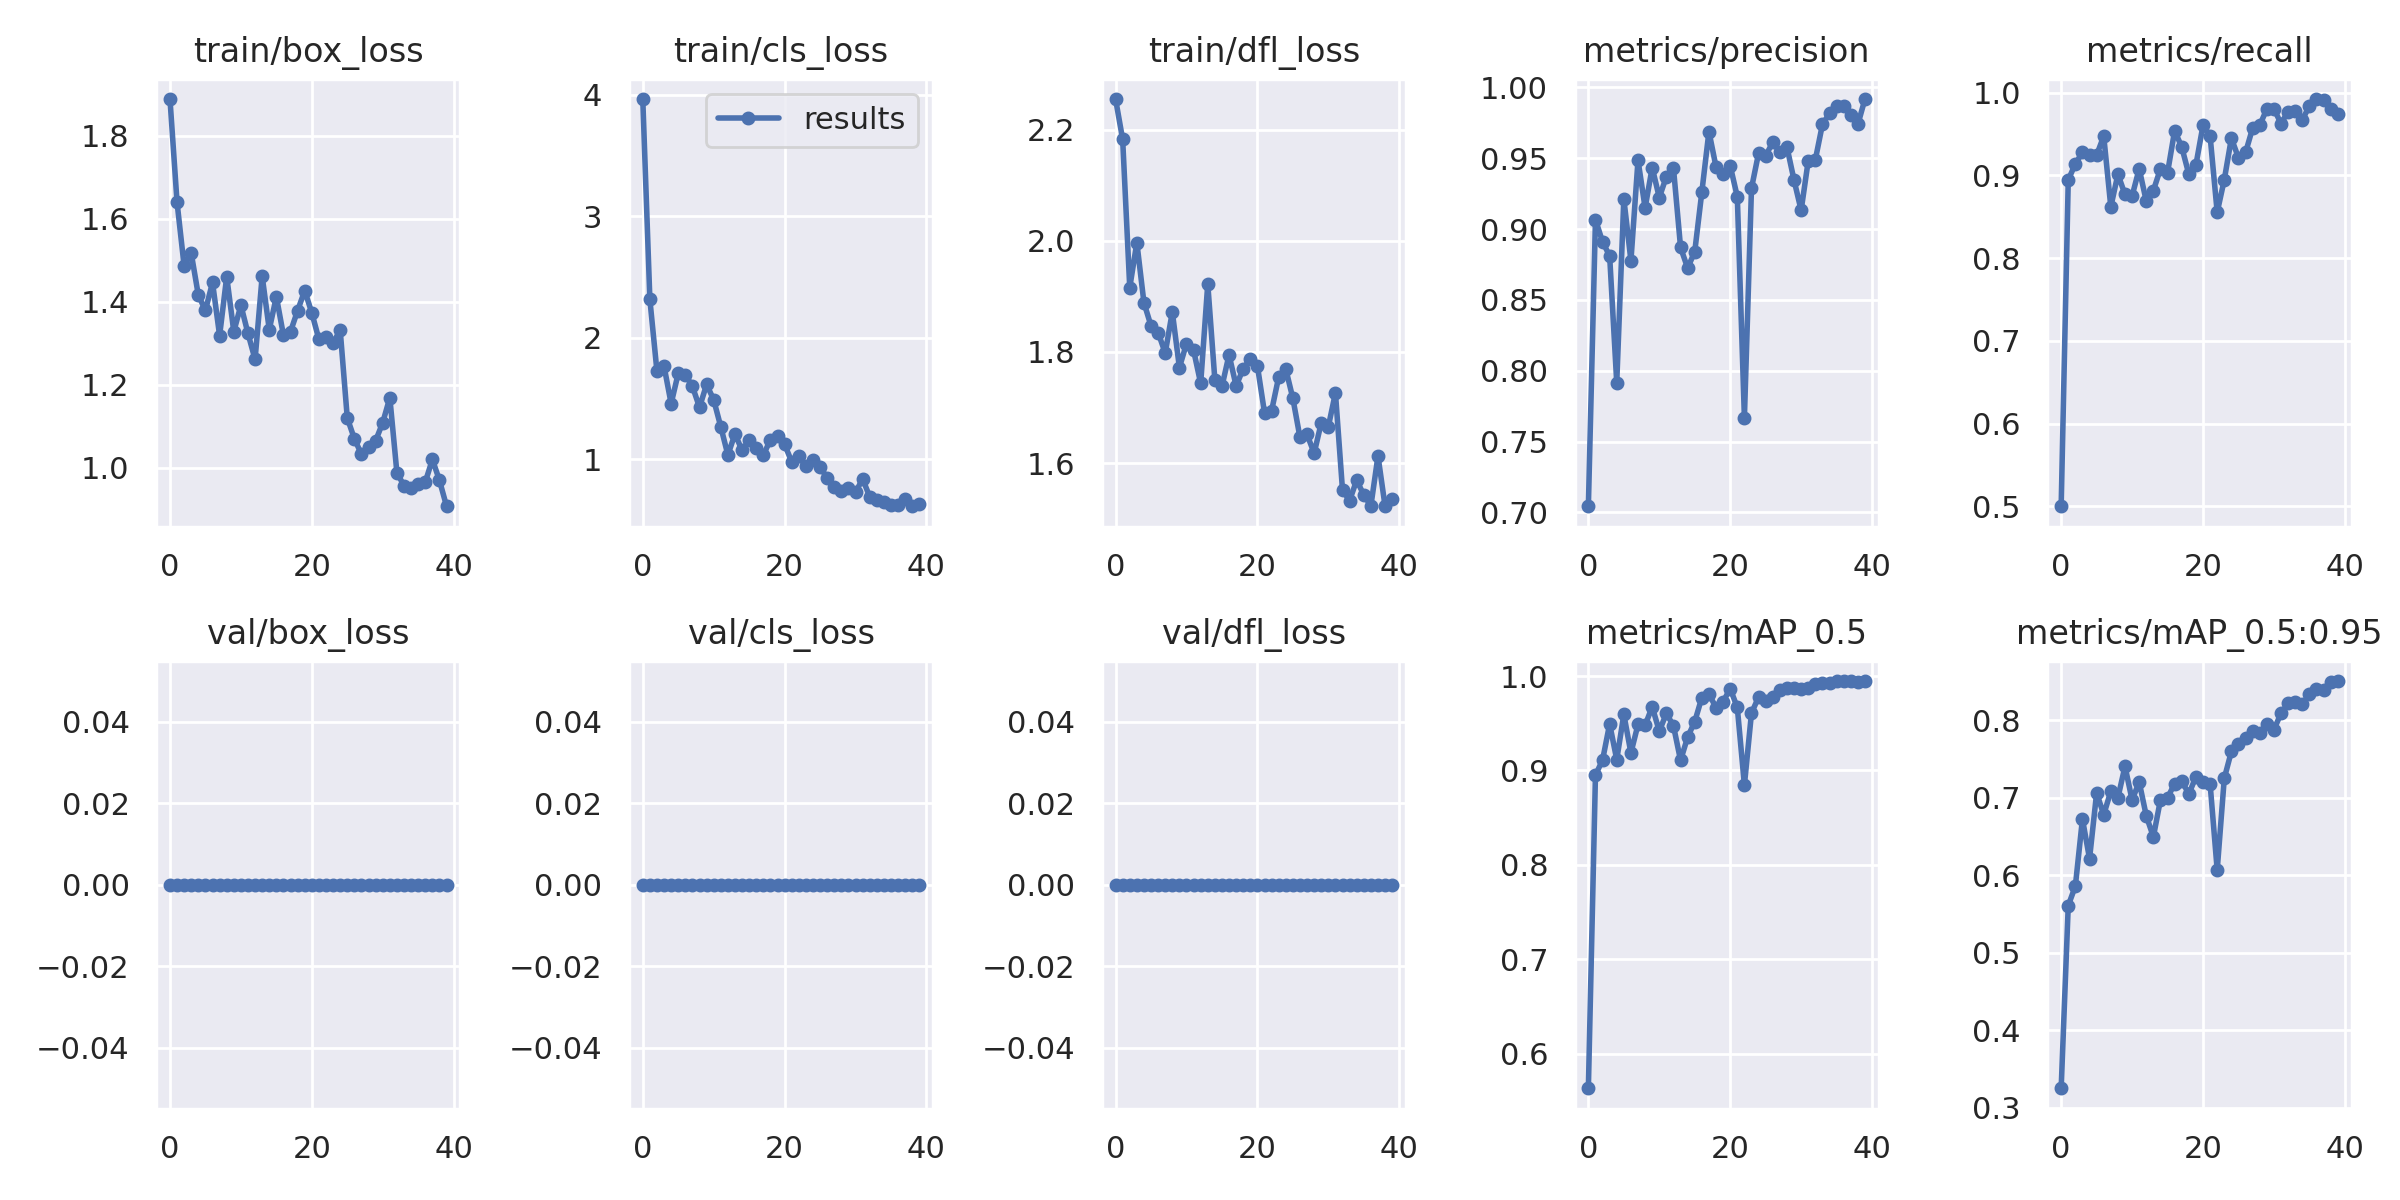

In [9]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

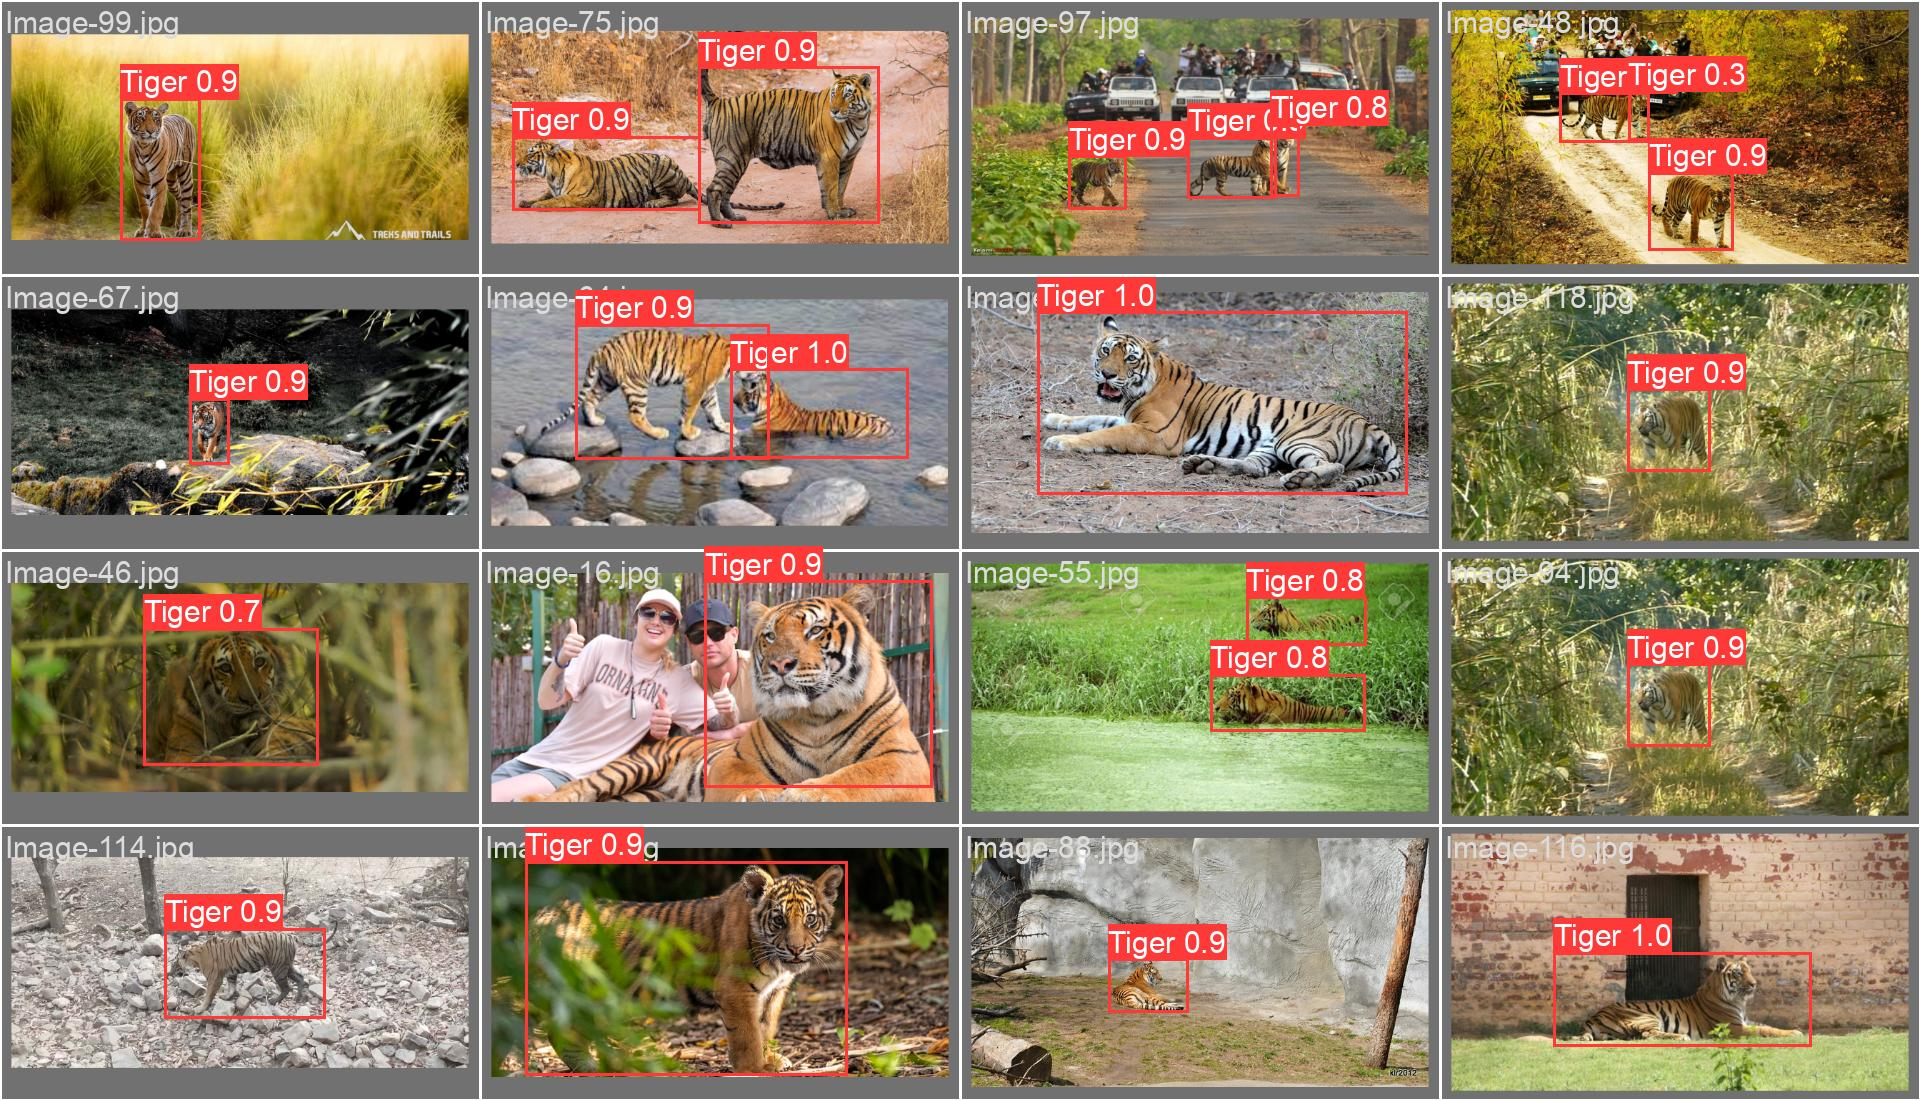

In [10]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch0_pred.jpg", width=1000)

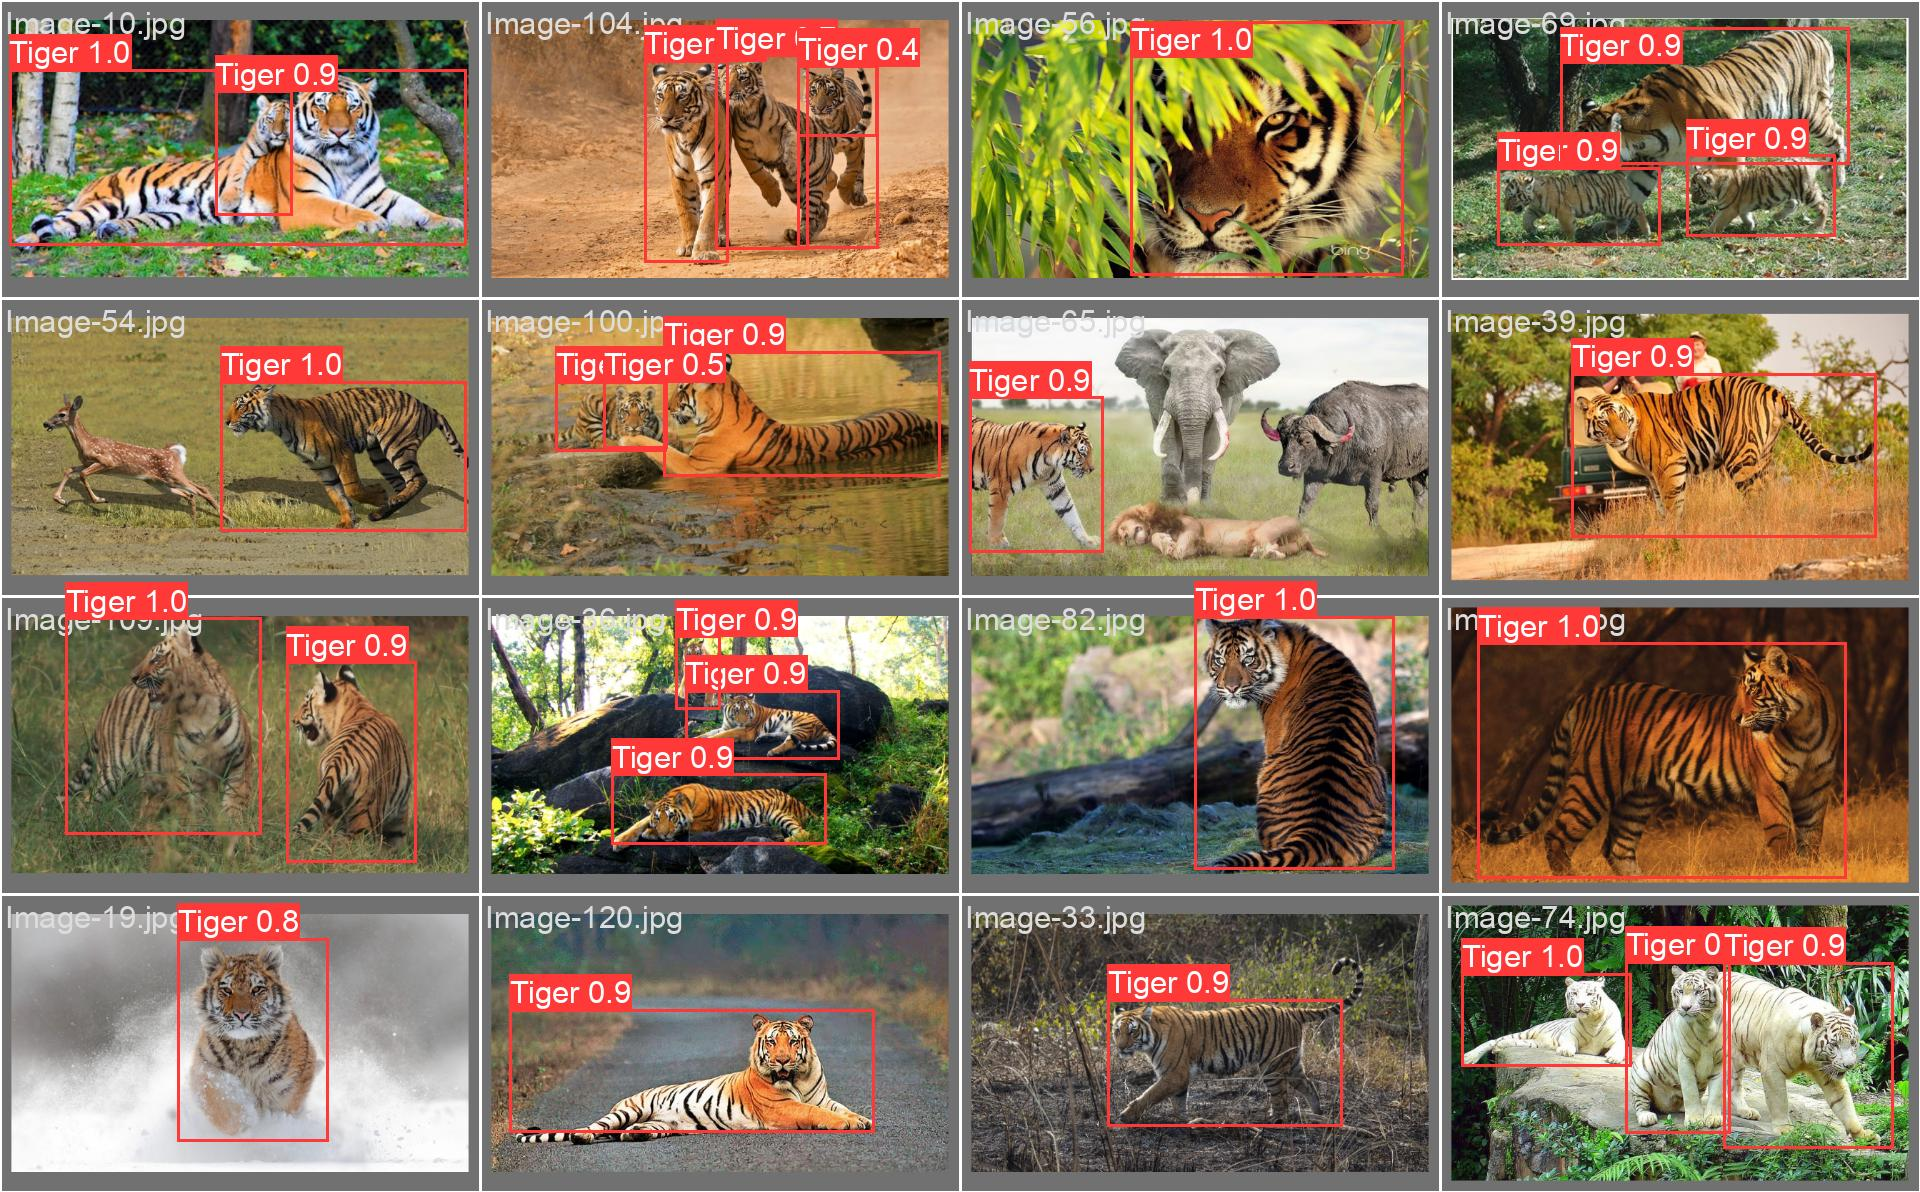

In [11]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch1_pred.jpg", width=1000)

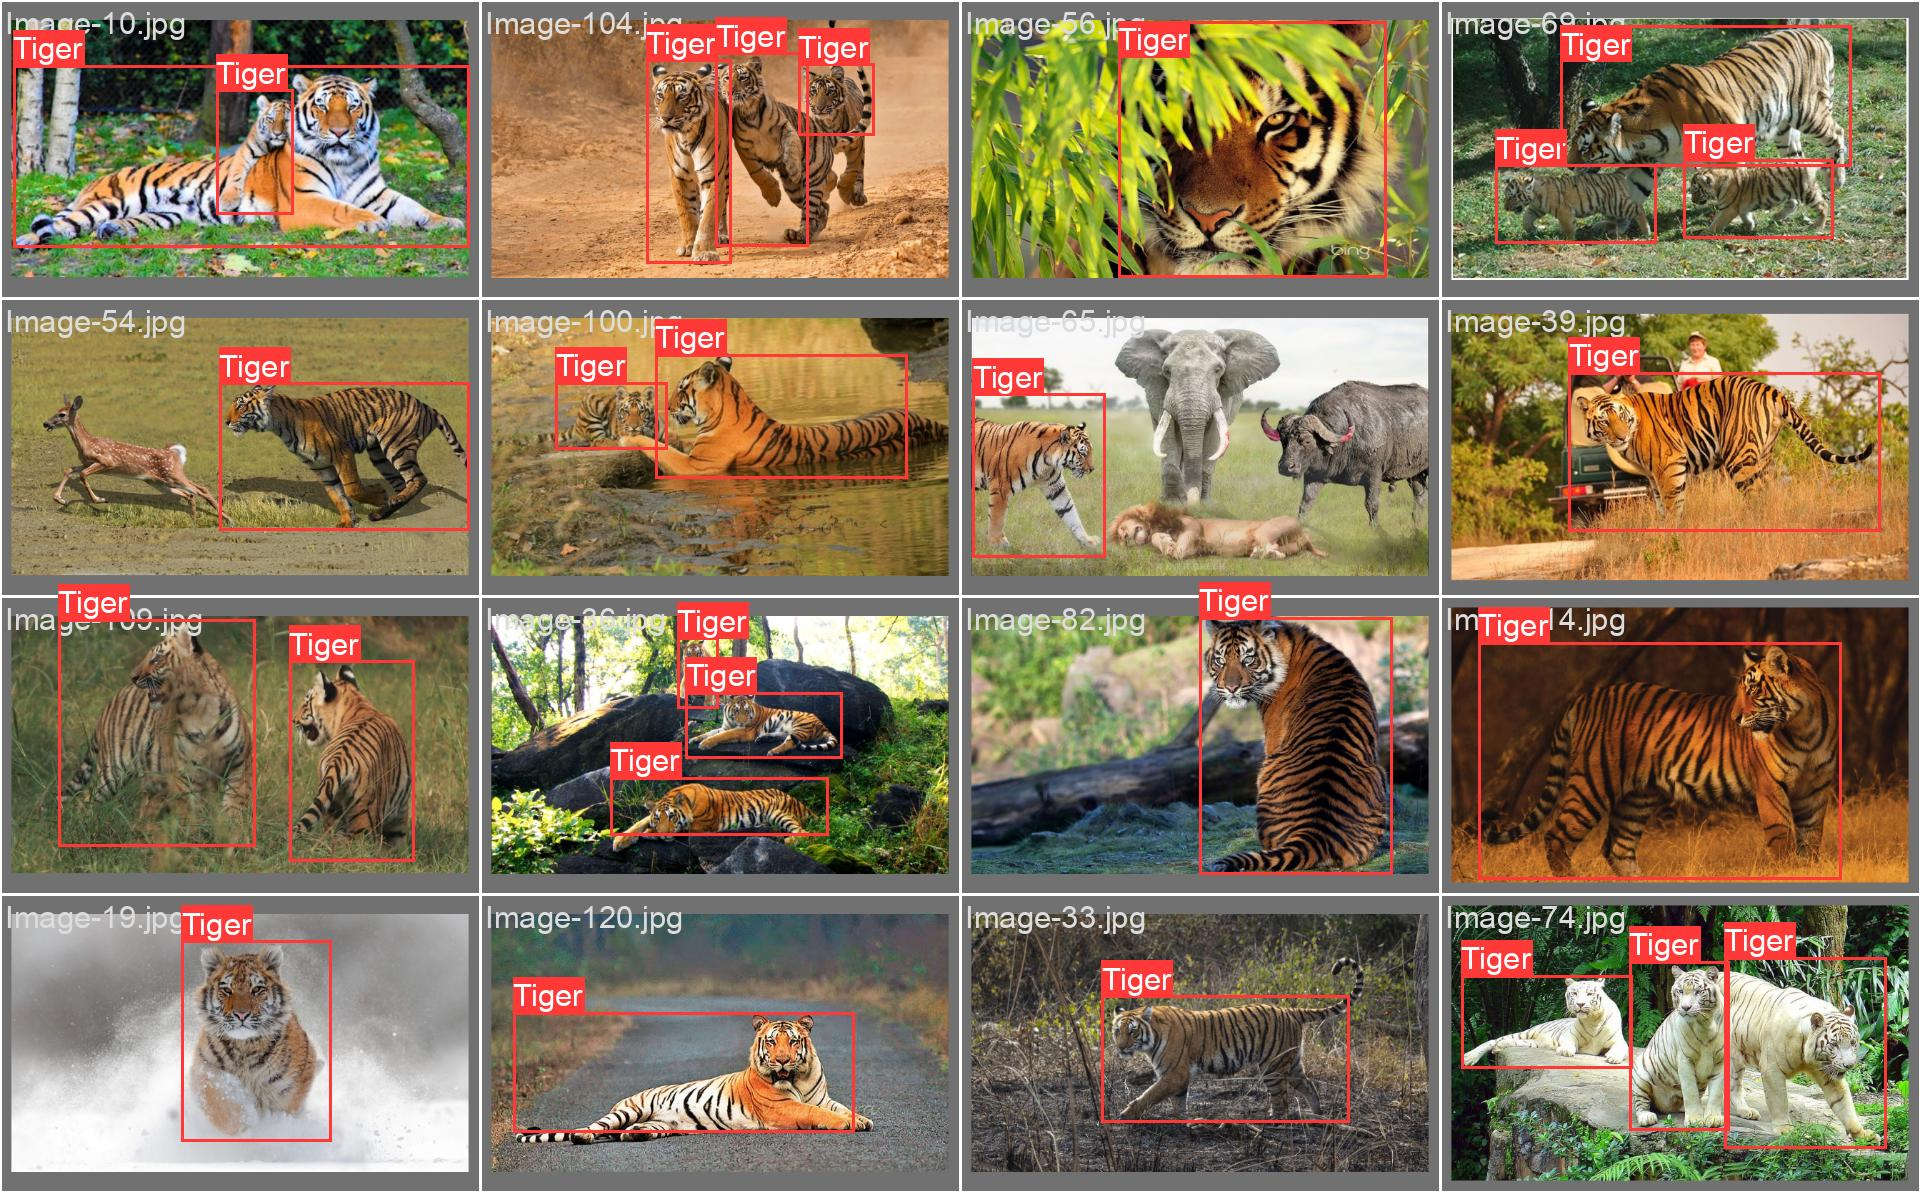

In [12]:
Image(filename=f"{HOME}/yolov9/runs/train/exp/val_batch1_labels.jpg", width=1000)